# Описание проекта по рекомендации тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф («Смарт» или «Ультра»). Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## 1. Откройте и изучите файл

In [110]:
import pandas as pd

# Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
   - сalls — количество звонков,
   - minutes — суммарная длительность звонков в минутах,
   - messages — количество sms-сообщений,
   - mb_used — израсходованный интернет-трафик в Мб,
   - is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## 2. Разбейте данные на выборки

In [111]:
users = pd.read_csv('/datasets/users_behavior.csv') # ниже знакомимся с данными таблицы

In [112]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [113]:
users.head(40)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [114]:
users.shape

(3214, 5)

 Разделяем исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 за два этапа.

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
users_train, user_valid_test = train_test_split(users, test_size = 0.4, random_state = 12345)

In [117]:
users_valid, users_test = train_test_split(user_valid_test, test_size = 0.5, random_state = 12345)

In [118]:
users_train.info() # проверяем разбиение на наборы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 3027 to 482
Data columns (total 5 columns):
calls       1928 non-null float64
minutes     1928 non-null float64
messages    1928 non-null float64
mb_used     1928 non-null float64
is_ultra    1928 non-null int64
dtypes: float64(4), int64(1)
memory usage: 90.4 KB


In [119]:
users_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 1386 to 3197
Data columns (total 5 columns):
calls       643 non-null float64
minutes     643 non-null float64
messages    643 non-null float64
mb_used     643 non-null float64
is_ultra    643 non-null int64
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


In [120]:
users_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 160 to 2313
Data columns (total 5 columns):
calls       643 non-null float64
minutes     643 non-null float64
messages    643 non-null float64
mb_used     643 non-null float64
is_ultra    643 non-null int64
dtypes: float64(4), int64(1)
memory usage: 30.1 KB


## 3. Исследуйте модели

Исследуем качество разных моделей (классификация деревом решений, случайный лес и логистическая регрессия), меняя гиперпараметры.

In [121]:
features_train = users_train.drop(['is_ultra'], axis=1)
target_train = users_train['is_ultra'] # целевой признак

In [122]:
features_valid = users_valid.drop(['is_ultra'], axis=1)
target_valid = users_valid['is_ultra']

In [123]:
from sklearn.tree import DecisionTreeClassifier  # будем исследовать модель классификации деревом решений для разной максимальной глубины дерева

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
import matplotlib.pyplot as plt

In [126]:
model1_accuracy_valid = {}

In [127]:
for depth in range(1, 20): # проверяем модель на валидационной выборке
    DecisionTree = []
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ':', end='')
    print(accuracy_score(target_valid, predictions_valid)) 
    k1 = depth
    model1_accuracy_valid[k1] = accuracy_score(target_valid, predictions_valid) 
#print(model1_accuracy_valid)

max_depth = 1 :0.7542768273716952
max_depth = 2 :0.7822706065318819
max_depth = 3 :0.7853810264385692
max_depth = 4 :0.7791601866251944
max_depth = 5 :0.7791601866251944
max_depth = 6 :0.7838258164852255
max_depth = 7 :0.7822706065318819
max_depth = 8 :0.7791601866251944
max_depth = 9 :0.7822706065318819
max_depth = 10 :0.7744945567651633
max_depth = 11 :0.7620528771384136
max_depth = 12 :0.7620528771384136
max_depth = 13 :0.7558320373250389
max_depth = 14 :0.7589424572317263
max_depth = 15 :0.7465007776049767
max_depth = 16 :0.7340590979782271
max_depth = 17 :0.7356143079315708
max_depth = 18 :0.7309486780715396
max_depth = 19 :0.7278382581648523


In [128]:
model1_accuracy_train = {}

In [129]:
for depth in range(1, 20): # поверяем модель на тренировочной выборке
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_train = model.predict(features_train)
    print('max_depth =', depth, ':', end='')
    print(accuracy_score(target_train, predictions_train))
    k2 = depth
    model1_accuracy_train[k2] = accuracy_score(target_train, predictions_train) 
print(model1_accuracy_train)

max_depth = 1 :0.7577800829875518
max_depth = 2 :0.7878630705394191
max_depth = 3 :0.8075726141078838
max_depth = 4 :0.8106846473029046
max_depth = 5 :0.8200207468879668
max_depth = 6 :0.8376556016597511
max_depth = 7 :0.8558091286307054
max_depth = 8 :0.8625518672199171
max_depth = 9 :0.8812240663900415
max_depth = 10 :0.8890041493775933
max_depth = 11 :0.9066390041493776
max_depth = 12 :0.9253112033195021
max_depth = 13 :0.941908713692946
max_depth = 14 :0.9553941908713693
max_depth = 15 :0.9678423236514523
max_depth = 16 :0.9787344398340249
max_depth = 17 :0.9844398340248963
max_depth = 18 :0.9885892116182573
max_depth = 19 :0.9891078838174274
{1: 0.7577800829875518, 2: 0.7878630705394191, 3: 0.8075726141078838, 4: 0.8106846473029046, 5: 0.8200207468879668, 6: 0.8376556016597511, 7: 0.8558091286307054, 8: 0.8625518672199171, 9: 0.8812240663900415, 10: 0.8890041493775933, 11: 0.9066390041493776, 12: 0.9253112033195021, 13: 0.941908713692946, 14: 0.9553941908713693, 15: 0.967842323651

Text(0.5, 0, 'max depth')

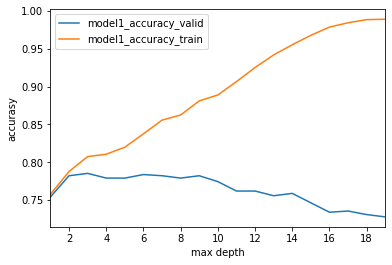

In [130]:
model1_accuracy_valid = pd.Series(model1_accuracy_valid)
model1_accuracy_train = pd.Series(model1_accuracy_train)
model1_acuracy = pd.DataFrame({'model1_accuracy_valid': model1_accuracy_valid, 'model1_accuracy_train': model1_accuracy_train})
#print(model1_acuracy)
model1_acuracy.plot()
plt.ylabel('accurasy')
plt.xlabel('max depth')

При значениях максимальной глубины 3 и выше точность растет только на тренировочной выборке, а на валидационной начинает падать. Можно сделать вывод, что тут модель начинает переобучаться.

In [138]:
from sklearn.ensemble import RandomForestClassifier # будем исследовать модель случайного леса для разного количества деревьев

In [139]:
model2_accuracy_valid = {}

In [140]:
for estim in range(2, 102, 10): # проверяем модель на валидационной выборке
    model = RandomForestClassifier(n_estimators=estim, random_state=12345)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    print("n_estimators =", estim, ":", accuracy)
    k3 = estim
    model2_accuracy_valid[k3] = accuracy_score(target_valid, predictions_valid) 
print(model2_accuracy_valid)

n_estimators = 2 : 0.7278382581648523
n_estimators = 12 : 0.7278382581648523
n_estimators = 22 : 0.7278382581648523
n_estimators = 32 : 0.7278382581648523
n_estimators = 42 : 0.7278382581648523
n_estimators = 52 : 0.7278382581648523
n_estimators = 62 : 0.7278382581648523
n_estimators = 72 : 0.7278382581648523
n_estimators = 82 : 0.7278382581648523
n_estimators = 92 : 0.7278382581648523
{2: 0.7278382581648523, 12: 0.7278382581648523, 22: 0.7278382581648523, 32: 0.7278382581648523, 42: 0.7278382581648523, 52: 0.7278382581648523, 62: 0.7278382581648523, 72: 0.7278382581648523, 82: 0.7278382581648523, 92: 0.7278382581648523}


In [142]:
model2_accuracy_train = {}

In [143]:
for estim in range(2, 102, 10): # проверяем модель на тренировочной выборке
    model = RandomForestClassifier(n_estimators=estim, random_state=12345)
    model.fit(features_train, target_train)
    predicted_train = model.predict(features_train)
    accuracy = accuracy_score(target_train, predictions_train)
    print("n_estimators =", estim, ":", accuracy)
    k4 = estim
    model2_accuracy_train[k4] = accuracy_score(target_train, predictions_train)
print(model2_accuracy_train)

n_estimators = 2 : 0.9891078838174274
n_estimators = 12 : 0.9891078838174274
n_estimators = 22 : 0.9891078838174274
n_estimators = 32 : 0.9891078838174274
n_estimators = 42 : 0.9891078838174274
n_estimators = 52 : 0.9891078838174274
n_estimators = 62 : 0.9891078838174274
n_estimators = 72 : 0.9891078838174274
n_estimators = 82 : 0.9891078838174274
n_estimators = 92 : 0.9891078838174274
{2: 0.9891078838174274, 12: 0.9891078838174274, 22: 0.9891078838174274, 32: 0.9891078838174274, 42: 0.9891078838174274, 52: 0.9891078838174274, 62: 0.9891078838174274, 72: 0.9891078838174274, 82: 0.9891078838174274, 92: 0.9891078838174274}


Text(0.5, 0, 'n_estimators')

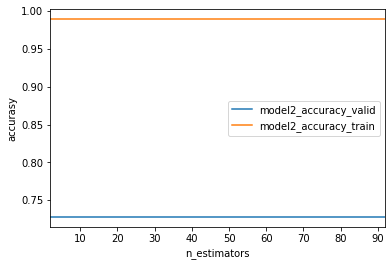

In [147]:
model2_accuracy_valid = pd.Series(model2_accuracy_valid)
model2_accuracy_train = pd.Series(model2_accuracy_train)
model2_acuracy = pd.DataFrame({'model2_accuracy_valid': model2_accuracy_valid, 'model2_accuracy_train': model2_accuracy_train})
#print(model2_acuracy)
model2_acuracy.plot()
plt.ylabel('accurasy')
plt.xlabel('n_estimators')

Точность на тренировочной выборке выше, чем на валидационной - модель переобучена.

In [148]:
from sklearn.linear_model import LogisticRegression # будем исследовать модель логистической регрессии

In [149]:
# отключим предупреждения 
#import warnings
#warnings.simplefilter('ignore')

In [150]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print(accuracy_score(target_valid, predictions_valid))

0.7278382581648523


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Выводы по моделям

1. классификация деревом решений
    Для данной модели изменяли максимальную глубину в диапазоне значений от 1 до 20.
    По полученным данным accuracy легко просматривается, что после значение 10 его значение начинает уменьшаться, соответвенно, ищем наилучший результат до 10. В нашем случае лучшее значение - 0.7854 при максимальной глубине 3.
2. случайный лес 
    Для данной модели проверяли значения accuracy для гиперпараметра n_estimators в диапазоне от 2 до 102 с шагом 10, все значения были одинаковы 0.7278, т.е. влияния не оказывалось (проверяди и более узкие диапазоны, там тоже прироста не выходило)
3. логистическая регрессия
    В данной модели настройку гиперпараметров не делали, поучили одно значение точности 0.7278.
    
Итого имеем самую высокую долю правильных ответов для модели классификация деревом решений с максимальной глубиной 3 (0.7854).

## 4. Проверьте модель на тестовой выборке

In [151]:
features_test = users_test.drop(['is_ultra'], axis=1)
target_test = users_test['is_ultra']

In [152]:
model = DecisionTreeClassifier(random_state=12345, max_depth=3)
model.fit(features_test, target_test)
predictions_test = model.predict(features_test)
print('accuracy =', accuracy_score(target_test, predictions_test))

accuracy = 0.7993779160186625


Провели тестирование модели на тестовой выборке.
Удалось достичь accuracy не меньше 0.75

## 5. (бонус) Проверьте модели на адекватность

In [153]:
print(users.loc[users['is_ultra'] == 1]['is_ultra'].count()) # посчитали количество абонентов тарифа ультра

985


In [154]:
print(1 - 985 / len(users)) # считаем долю большего класса 

0.693528313627878


В нашей выборке классы не сбалансированы (0.69 и 0.31).
Если же классы не сбалансированные, то адекватная модель должна выдавать качество больше, чем доля большего класса. 
На тестовой выборке мы получили значение accuracy 0.7994 > 0.6935 (доля большего класса).

Соответсвенно, модель классификации  деревом решений с максимальной глубиной 3 адекватная.

Если говорить о моделях случайный лес и логистическая регрессия, то они тоже могут считаться адекватными, т.к. показывают accuracy > 0.69.
Но для нас задана минимальная accuracy 0.75, поэтому их мы отклонили.